### 範例的特點：
1. 使用經典的 MNIST 手寫數字數據集（簡化版）
2. 執行多類別分類（0-9，共10個類別）
3. 加入了視覺化元素：
   - 混淆矩陣熱圖
   - 預測結果展示
   - 各個數字的分類準確率
#### 實際應用場景：
- 可用於郵政編碼識別
- 銀行支票數字識別等

### 數據集說明：
- 特徵：8x8 像素的手寫數字圖片（64個特徵）
- 目標變數：0-9的數字標籤
- 應用：光學字符識別(OCR)系統的基礎


模型準確度：0.85


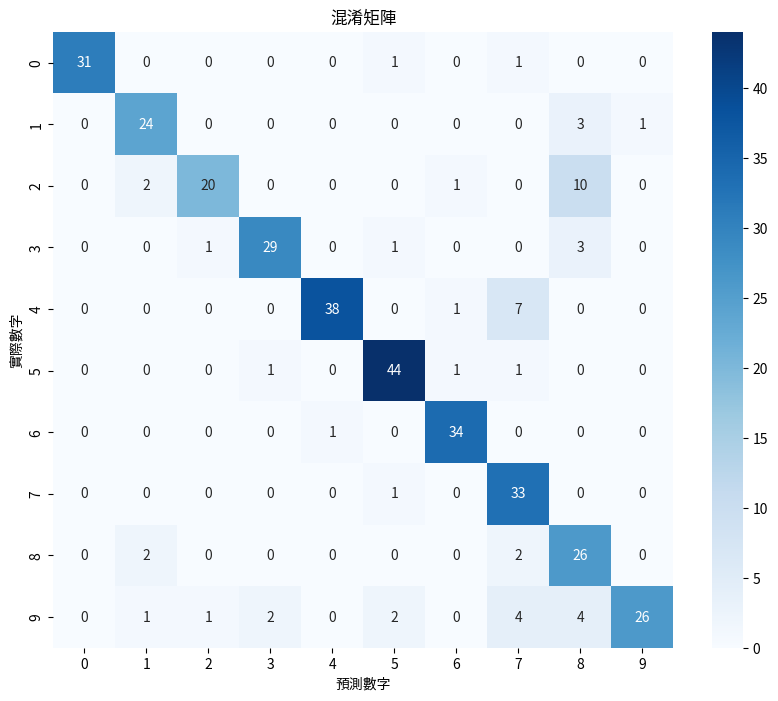

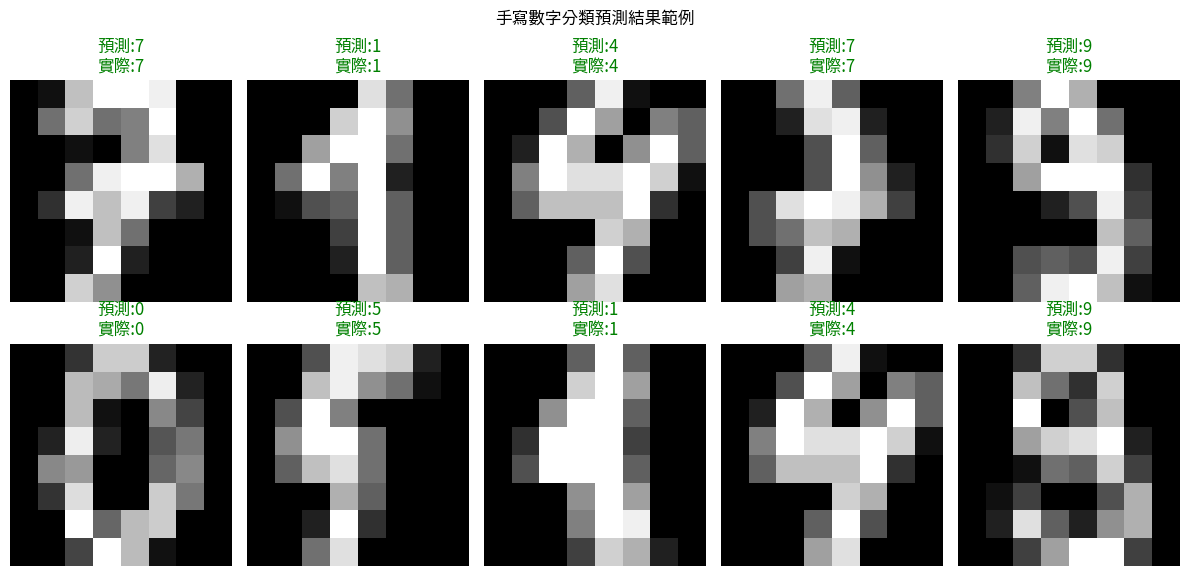

數字 0 的分類準確率: 0.94
數字 1 的分類準確率: 0.86
數字 2 的分類準確率: 0.61
數字 3 的分類準確率: 0.85
數字 4 的分類準確率: 0.83
數字 5 的分類準確率: 0.94
數字 6 的分類準確率: 0.97
數字 7 的分類準確率: 0.97
數字 8 的分類準確率: 0.87
數字 9 的分類準確率: 0.65


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 設定中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 1. 載入手寫數字數據集
digits = load_digits()
X = digits.data  # 每個數字圖片被展平為 64 個特徵
y = digits.target

# 2. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立高斯樸素貝葉斯模型
model = GaussianNB()

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 繪製混淆矩陣
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩陣')
plt.ylabel('實際數字')
plt.xlabel('預測數字')
plt.show()

# 8. 顯示一些預測結果
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # 隨機選擇一個測試樣本
    idx = np.random.randint(len(X_test))
    # 顯示圖片
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.axis('off')
    # 添加標題顯示預測結果
    ax.set_title(f'預測:{y_pred[idx]}\n實際:{y_test[idx]}',
                 color='green' if y_pred[idx] == y_test[idx] else 'red')

plt.suptitle('手寫數字分類預測結果範例')
plt.tight_layout()
plt.show()

# 9. 計算每個數字的分類準確率
for digit in range(10):
    mask = y_test == digit
    digit_accuracy = accuracy_score(y_test[mask], y_pred[mask])
    print(f"數字 {digit} 的分類準確率: {digit_accuracy:.2f}")